In [12]:
import numpy as np
import torch
data = np.load('quick_draw_data/ambulance.npy')


148004


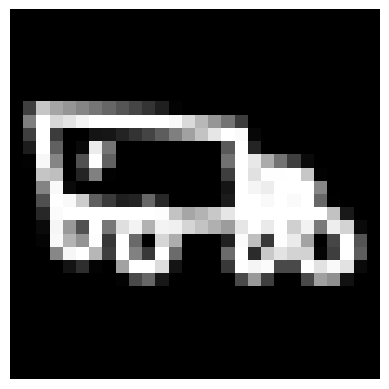

In [13]:
import matplotlib.pyplot as plt

print(len(data))
# Load the first image from the loaded data
image = data[3].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off the axis numbers
plt.show()


In [14]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from datasets.flat import FlattenedDoodleSet

full_dataset = FlattenedDoodleSet(data_dir='./quick_draw_data')


Total images in dataset: 7008988


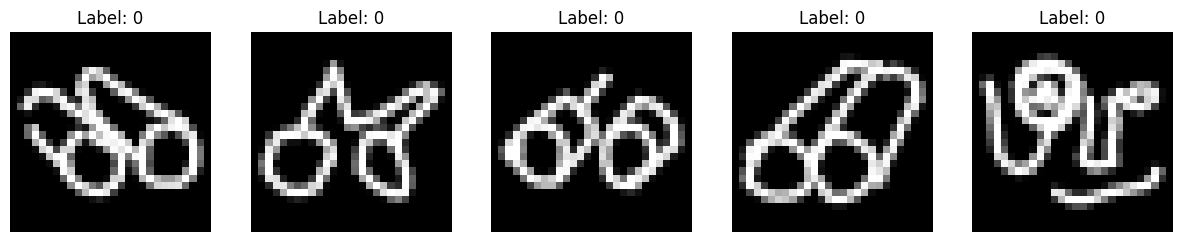

Image 0 - Label: 0, Class Name: binoculars
Image 1 - Label: 0, Class Name: binoculars
Image 2 - Label: 0, Class Name: binoculars
Image 3 - Label: 0, Class Name: binoculars
Image 4 - Label: 0, Class Name: binoculars


In [15]:
import matplotlib.pyplot as plt

# 1. Verify Length
print(f"Total images in dataset: {len(full_dataset)}")

# 2. Sample and Display
num_samples = 5
fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))

for i in range(num_samples):
    image, label = full_dataset[i]
    img = image.reshape(28, 28)  # Reshape the image for visualization

    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Label: {label}")

plt.show()

# 3. Check Labels
for i in range(num_samples):
    _, label = full_dataset[i]
    class_name = list(full_dataset.class_to_idx.keys())[list(full_dataset.class_to_idx.values()).index(label)]
    print(f"Image {i} - Label: {label}, Class Name: {class_name}")


In [16]:
from torch.utils.data import DataLoader, random_split

train_size = int(0.8 * len(full_dataset))
val_size = (len(full_dataset) - train_size) // 2
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [17]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN(num_classes=len(full_dataset.class_to_idx))



In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
from tqdm import tqdm

num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Wrap the DataLoader with tqdm to show the progress bar
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    for images, labels in pbar:
        optimizer.zero_grad()
        outputs = model(images.float())  # Ensure the images are in float format
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update the tqdm progress bar description with the current average loss
        pbar.set_description(f"Epoch {epoch+1}/{num_epochs}, Avg Loss: {running_loss/(pbar.n+1):.4f}")

    # Print average loss per epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/3, Avg Loss: 1.9387: 100%|██████████| 175225/175225 [07:16<00:00, 401.18it/s]


Epoch 1/3, Loss: 1.9387


Epoch 2/3, Avg Loss: 1.9019:   2%|▏         | 3715/175225 [00:09<07:13, 395.61it/s]